# Data Analysis and Cleaning
analysis data and do some dirty work for cleaning
- <a href='#1'>1. analysis data</a> 
- <a href='#2'>2. task2</a> 
- <a href='#3'>3. task3</a>

In [1]:
import sys
import os 

from datetime import datetime

import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sys.path.append('../')
from utils import (
    check_columns, 
    check_nan_value, 
    correct_column_type, 
    #decrypt_model, 
    plot_dist_of_cols,
)
import conf

In [2]:
# global settings
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',100)
sns.set(rc={'figure.figsize':(11,4)})
font = fm.FontProperties(fname = os.path.join(conf.LIB_DIR,'simsun.ttc'))

In [6]:
# global variables
DEFAULT_MISSING_VALUE = 0

In [7]:
# functions
def __dummy():
    pass

def diivide_files_into_raw_and_normalized():
    pass

### <a id='1'> 1.task1</a>

In [3]:
# disk_sample_fault_tag
fault_tag_df = pd.read_csv(os.path.join(conf.DATA_DIR,'disk_sample_fault_tag.csv'))

year  month
2017  7         55
      8         82
      9         93
      10        80
      11        81
      12        20
2018  1        128
      2        108
      3        119
      4        117
      5        104
      6        138
      7        167
Name: month, dtype: int32


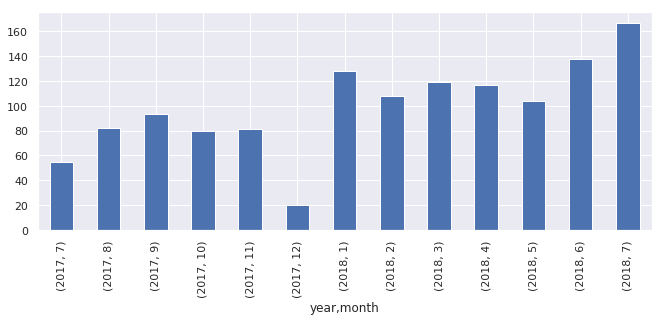

In [6]:
def show_the_record_of_each_month_of_each_year(train_fe_df):
    train_fe_df['year'] =  pd.to_datetime(train_fe_df['fault_time']).dt.year.astype(np.int32)
    train_fe_df['month'] = pd.to_datetime(train_fe_df['fault_time']).dt.month.astype(np.int32)
    train_fe_tmp_df = train_fe_df[['month','serial_number','model','year']]
    train_fe_temp_group = train_fe_tmp_df.groupby(['year','month'])
    print(train_fe_temp_group['month'].agg(lambda x:len(x)))
    train_fe_temp_group['month'].agg(lambda x:len(x)).plot(kind='bar')
show_the_record_of_each_month_of_each_year(fault_tag_df)

In [6]:
fault_tag_df["tag"].value_counts()

0    473
2    200
3    171
1    171
6    153
5     64
4     60
Name: tag, dtype: int64

In [24]:
#display num of faults and type of faults in different months
fault_num = {}
fault_type = {}
tags = [0, 1, 2, 3, 4, 5, 6]
fault_4 = []
for index, row in fault_tag_df.iterrows():
    f_time = row["fault_time"].split('-')
    tag = int(row["tag"])
    month = f_time[0] + f_time[1]
    if month not in fault_num:
        fault_num[month] = 0
    if month not in fault_type:
        fault_type[month] = [0]*7
    fault_num[month] += 1
    fault_type[month][tag] += 1
    if month == "201804":
        fault_4.append(row["serial_number"])
print(sorted(fault_num.items(), key = lambda item:item[1], reverse = True))

[('201807', 167), ('201806', 138), ('201801', 128), ('201803', 119), ('201804', 117), ('201802', 108), ('201805', 104), ('201709', 93), ('201708', 82), ('201711', 81), ('201710', 80), ('201707', 55), ('201712', 20)]


In [60]:
fault_tag_df.loc[fault_tag_df["serial_number"]=="disk_110667"]

,manufacturer,model,serial_number,fault_time,tag
12,A,1,disk_110667,2017-07-23,0


Text(0.5, 1.0, '201709')

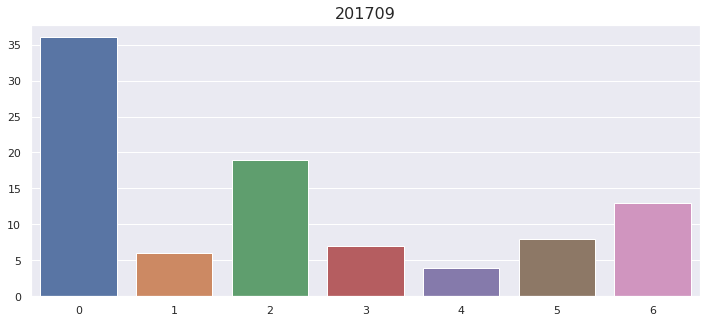

Text(0.5, 1.0, '201805')

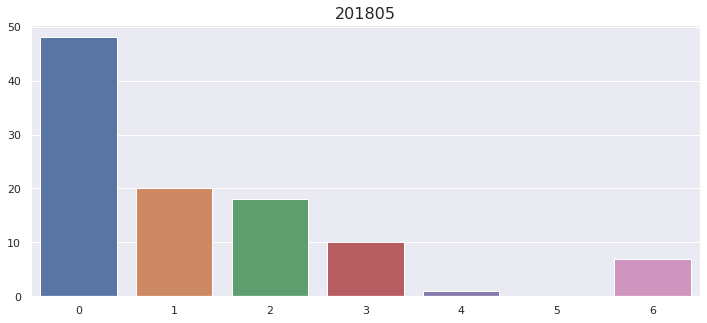

Text(0.5, 1.0, '201806')

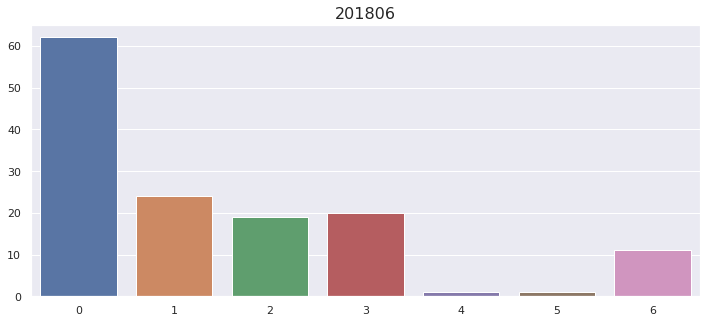

Text(0.5, 1.0, '201802')

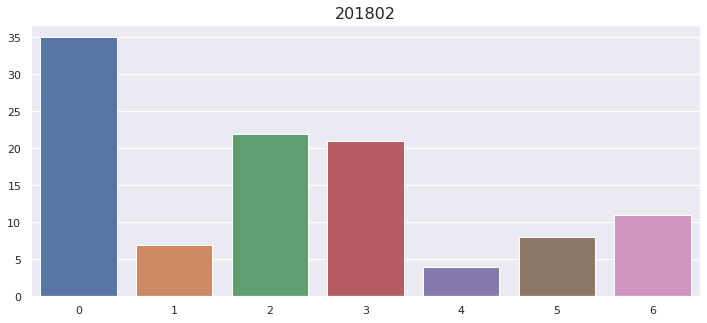

Text(0.5, 1.0, '201710')

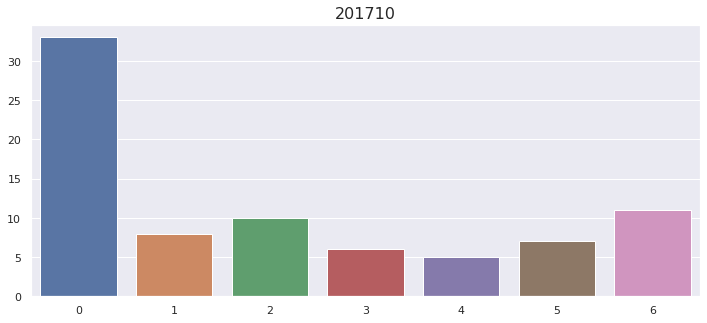

Text(0.5, 1.0, '201711')

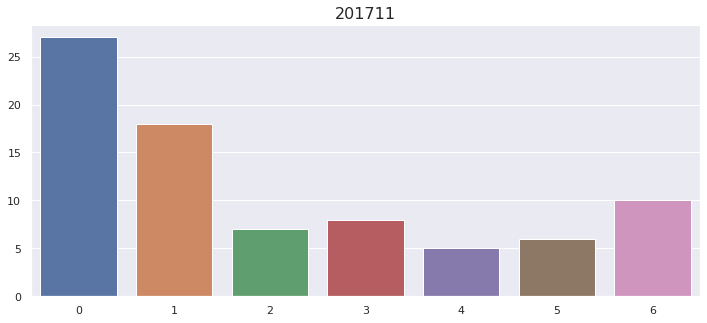

Text(0.5, 1.0, '201708')

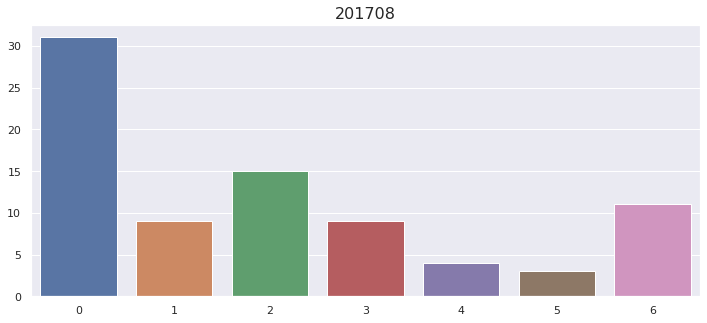

Text(0.5, 1.0, '201807')

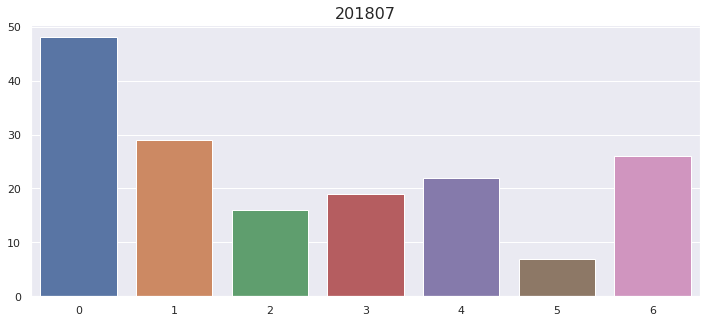

Text(0.5, 1.0, '201707')

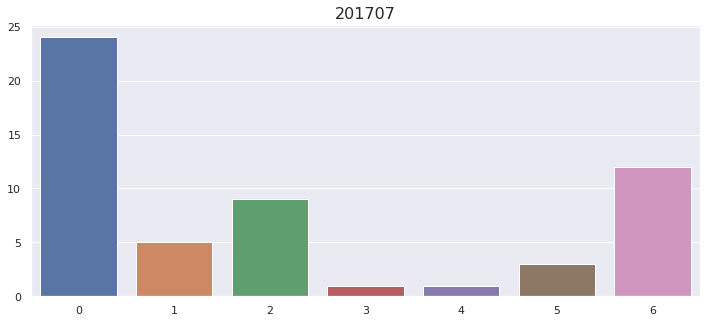

Text(0.5, 1.0, '201804')

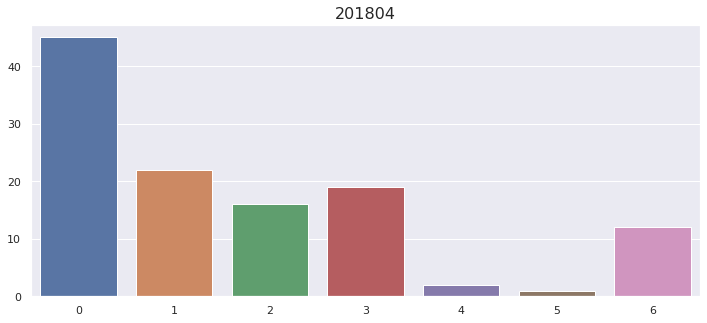

Text(0.5, 1.0, '201803')

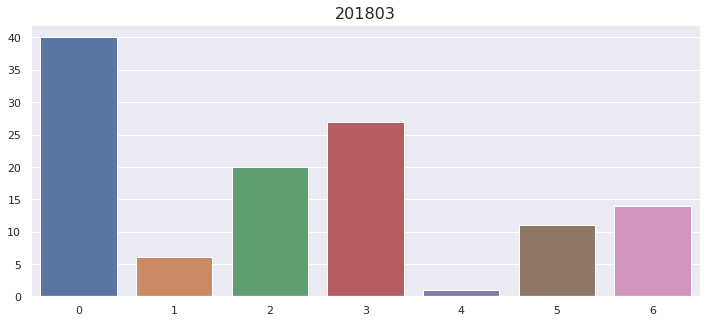

Text(0.5, 1.0, '201801')

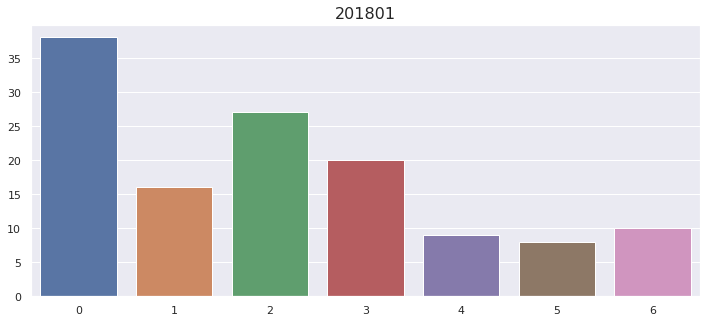

Text(0.5, 1.0, '201712')

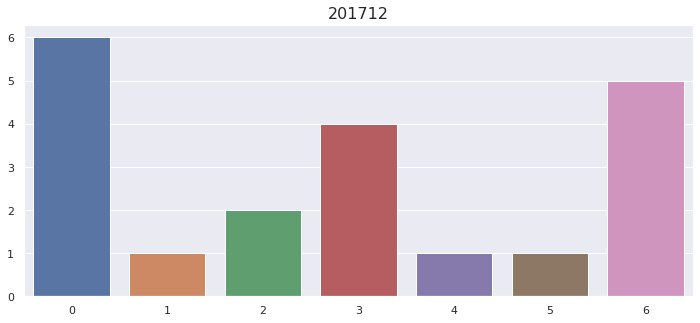

In [49]:
#show nums of different faults in each month
for item in fault_type.items():
    f, ax= plt.subplots(figsize = (12, 5))
    ax.set_title(item[0], fontsize=16)
    sns.barplot(x = tags, y = item[1])
    plt.show()

In [7]:
fault_tag_df.head()

,manufacturer,model,serial_number,fault_time,tag
0,A,1,disk_100102,2017-09-29,0
1,A,1,disk_100584,2018-05-02,6
2,A,1,disk_100669,2018-06-22,3
3,A,1,disk_101190,2018-02-19,5
4,A,1,disk_103158,2017-10-20,0


In [51]:
log_1707_norm_df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707_norm.csv'))

In [55]:
log_1707_norm_df.shape

(1610007, 28)

In [59]:
log_1707_norm_df.loc[log_1707_norm_df["serial_number"] == "disk_110667"]

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_184_normalized,smart_187_normalized,smart_188_normalized,smart_189_normalized,smart_190_normalized,smart_191_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_195_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
51876,disk_110667,A,1,20170715,82.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,38.0,100.0,100.0,200.0,NaN,NaN,NaN
93816,disk_110667,A,1,20170718,83.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,37.0,100.0,100.0,200.0,NaN,NaN,NaN
117003,disk_110667,A,1,20170717,84.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,37.0,100.0,100.0,200.0,NaN,NaN,NaN
195220,disk_110667,A,1,20170711,81.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,36.0,100.0,100.0,200.0,NaN,NaN,NaN
218586,disk_110667,A,1,20170713,81.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,35.0,100.0,100.0,200.0,NaN,NaN,NaN
441011,disk_110667,A,1,20170716,82.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,37.0,100.0,100.0,200.0,NaN,NaN,NaN
555642,disk_110667,A,1,20170720,66.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,38.0,100.0,100.0,200.0,NaN,NaN,NaN
768795,disk_110667,A,1,20170714,81.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,45.0,100.0,100.0,200.0,NaN,NaN,NaN
969068,disk_110667,A,1,20170719,83.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,36.0,100.0,100.0,200.0,NaN,NaN,NaN
1062829,disk_110667,A,1,20170712,80.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,41.0,100.0,100.0,200.0,NaN,NaN,NaN


In [69]:
print(log_1707_norm_df.min(), log_1707_norm_df.max())

serial_number             disk_0
manufacturer                   A
model                          1
dt                      20170709
smart_1_normalized            36
smart_3_normalized            83
smart_4_normalized            53
smart_5_normalized             1
smart_7_normalized            42
smart_9_normalized            11
smart_10_normalized           98
smart_12_normalized           47
smart_184_normalized           1
smart_187_normalized           1
smart_188_normalized          75
smart_189_normalized           1
smart_190_normalized          44
smart_191_normalized           1
smart_192_normalized          74
smart_193_normalized          63
smart_194_normalized           0
smart_195_normalized           1
smart_197_normalized           1
smart_198_normalized           1
smart_199_normalized         200
smart_240_normalized         100
smart_241_normalized         100
smart_242_normalized         100
dtype: object serial_number           disk_99996
manufacturer               

In [ ]:
# disk_sample_smart_log_201707.csv
log_1711_norm_df = pd.DataFrame()
log_1711_raw_df = pd.DataFrame()

In [9]:
primary_key = ['serial_number','manufacturer', 'model', 'dt']
norm_cols = primary_key + ['smart_%s_normalized'%i for i in range(1,256)]
raw_cols = primary_key + ['smart_%sraw'%i for i in range(1,256)]

In [ ]:
for sub_df in pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707.csv'),chunksize=1e+4):
        log_1711_norm_df = pd.concat([log_1711_norm_df, sub_df[norm_cols]])
        log_1711_raw_df = pd.concat([log_1711_raw_df, sub_df[raw_cols]])

In [ ]:
# remove nan column
log_1711_norm_df.dropna(axis=1, how='all', inplace=True)
log_1711_raw_df.dropna(axis=1,how='all', inplace=True)

In [ ]:
log_1711_norm_df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707_norm.csv'),index=False)
log_1711_raw_df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707_raw.csv'),index=False)

In [ ]:
log_1711_norm_df.head()

In [14]:
fault_tag_df

,manufacturer,model,serial_number,fault_time,tag
0,A,1,disk_100102,2017-09-29,0
1,A,1,disk_100584,2018-05-02,6
2,A,1,disk_100669,2018-06-22,3
3,A,1,disk_101190,2018-02-19,5
4,A,1,disk_103158,2017-10-20,0
...,...,...,...,...,...
1287,A,1,disk_41617,2018-05-15,1
1288,A,1,disk_41645,2018-04-27,1
1289,A,1,disk_42826,2018-02-11,0
1290,A,1,disk_429,2017-11-22,3


In [34]:
import time

In [35]:
# use a dict to store fault information of each disk
# in given months.
t1 = time.time()
fault_sub_dfs = dict(tuple(fault_tag_df.groupby(["manufacturer", "model", "serial_number"])))
t2 = time.time()
print(t2-t1)

0.48036718368530273


In [37]:
t1 = time.time()
fault_sub_dfs[('A', 1, 'disk_100102')]["fault_time"]
t2 = time.time()
print(t2-t1)

0    2017-09-29
Name: fault_time, dtype: object

0.007529497146606445


In [40]:
t1 = time.time()
fault_dic[('A', 1, 'disk_100102')]["date"]
t2 = time.time()
print(t2-t1)

'2017-09-29'

0.0026924610137939453


In [42]:
(pd.to_datetime("2017-09-29") - pd.to_datetime("20170715")).days

76

In [39]:
# use a dict to store fault information of each disk
# in given months.
t3 = time.time()
fault_dic = {}
serial_list = []

for _, row in fault_tag_df.iterrows():
    f_time = row["fault_time"]
    tag = row["tag"]
    key = tuple([row["manufacturer"], row["model"], row["serial_number"]])
    if key not in fault_dic.keys():
        sub_dic = {}
        sub_dic["date"] = f_time
        sub_dic["tag"] = tag
        fault_dic[key] = sub_dic
t4 = time.time()
print(t4-t3)

0.3643171787261963


In [30]:
fault_dic

{('A', 1, 'disk_100102'): {'date': '2017-09-29', 'tag': 0},
 ('A', 1, 'disk_100584'): {'date': '2018-05-02', 'tag': 6},
 ('A', 1, 'disk_100669'): {'date': '2018-06-22', 'tag': 3},
 ('A', 1, 'disk_101190'): {'date': '2018-02-19', 'tag': 5},
 ('A', 1, 'disk_103158'): {'date': '2017-10-20', 'tag': 0},
 ('A', 1, 'disk_103174'): {'date': '2017-11-06', 'tag': 0},
 ('A', 1, 'disk_103898'): {'date': '2017-11-22', 'tag': 1},
 ('A', 1, 'disk_104022'): {'date': '2017-08-19', 'tag': 4},
 ('A', 1, 'disk_106835'): {'date': '2017-10-16', 'tag': 0},
 ('A', 1, 'disk_107044'): {'date': '2018-07-25', 'tag': 1},
 ('A', 1, 'disk_107281'): {'date': '2017-10-07', 'tag': 0},
 ('A', 1, 'disk_110049'): {'date': '2018-06-06', 'tag': 1},
 ('A', 1, 'disk_110667'): {'date': '2017-07-23', 'tag': 0},
 ('A', 1, 'disk_111061'): {'date': '2017-09-25', 'tag': 0},
 ('A', 1, 'disk_112997'): {'date': '2018-05-18', 'tag': 0},
 ('A', 1, 'disk_113032'): {'date': '2018-04-27', 'tag': 2},
 ('A', 1, 'disk_113535'): {'date': '2018

In [12]:
print(len(serial_list))

21


In [70]:
data = ['07', '08', '09', '10', '11', '12']
filename = "data_2017_tag_flag.h5"
hdf_17 = pd.HDFStore(os.path.join(conf.DATA_DIR,filename),'w')

for i in data:
    print('disk_sample_smart_log_2017%s_norm.csv' % i)
    df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_2017%s_norm.csv' % i))    
    df["tag"] = 0
    df["flag"] = False
    for row in df.itertuples():
        number = getattr(row, 'serial_number')
        if number in fault_dic:
            fault_date = fault_dic[number]["date"]
            date = getattr(row, "dt")
            if days_diff(fault_date, date) > 0 and days_diff(fault_date, date) <= 30:
                df.loc[row[0], "tag"] = fault_dic[number]["tag"] + 1
            elif days_diff(fault_date, date) == 0:
                df.loc[row[0], "flag"] = True
    correct_colum_type(df)
    hdf_17.append(key='data', value=df,format='table', data_columns=True)
    del df
    #df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_20180%s_norm_tag.csv'%i),index=False)
    print("month %s finished" % i)

disk_sample_smart_log_201707_norm.csv
serial_number                   object
manufacturer                    object
model                             int8
dt                      datetime64[ns]
smart_1_normalized             float32
smart_3_normalized             float32
smart_4_normalized             float32
smart_5_normalized             float32
smart_7_normalized             float32
smart_9_normalized             float32
smart_10_normalized            float32
smart_12_normalized            float32
smart_184_normalized           float32
smart_187_normalized           float32
smart_188_normalized           float32
smart_189_normalized           float32
smart_190_normalized           float32
smart_191_normalized           float32
smart_192_normalized           float32
smart_193_normalized           float32
smart_194_normalized           float32
smart_195_normalized           float32
smart_197_normalized           float32
smart_198_normalized           float32
smart_199_normalized      

In [71]:
hdf_17.close()

In [72]:
data = ['04', '05', '06']
#data = ['01', '02', '03', '04', '05', '06', '07']
filename = "data_2018_4_5_6_tag_flag.h5"
hdf_18 = pd.HDFStore(os.path.join(conf.DATA_DIR,filename),'w')

for i in data:
    print('disk_sample_smart_log_2018%s_norm.csv' % i)
    df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_2018%s_norm.csv' % i))    
    df["tag"] = 0
    df["flag"] = False
    for row in df.itertuples():
        number = getattr(row, 'serial_number')
        if number in fault_dic:
            fault_date = fault_dic[number]["date"]
            date = getattr(row, "dt")
            if days_diff(fault_date, date) > 0 and days_diff(fault_date, date) <= 30:
                df.loc[row[0], "tag"] = fault_dic[number]["tag"] + 1
            elif days_diff(fault_date, date) == 0:
                df.loc[row[0], "flag"] = True
    correct_colum_type(df)
    hdf_18.append(key='data', value=df,format='table', data_columns=True)
    del df
    #df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_20180%s_norm_tag.csv'%i),index=False)
    print("month %s finished" % i)

disk_sample_smart_log_201804_norm.csv
serial_number                   object
manufacturer                    object
model                             int8
dt                      datetime64[ns]
smart_1_normalized             float32
smart_3_normalized             float32
smart_4_normalized             float32
smart_5_normalized             float32
smart_7_normalized             float32
smart_9_normalized             float32
smart_10_normalized            float32
smart_12_normalized            float32
smart_184_normalized           float32
smart_187_normalized           float32
smart_188_normalized           float32
smart_189_normalized           float32
smart_190_normalized           float32
smart_191_normalized           float32
smart_192_normalized           float32
smart_193_normalized           float32
smart_194_normalized           float32
smart_195_normalized           float32
smart_197_normalized           float32
smart_198_normalized           float32
smart_199_normalized      

In [73]:
hdf_18.close()

In [74]:
#data = ['04', '05', '06']
data = ['01', '02', '03']
filename = "data_2018_1_2_3_tag_flag.h5"
hdf_123 = pd.HDFStore(os.path.join(conf.DATA_DIR,filename),'w')

for i in data:
    print('disk_sample_smart_log_2018%s_norm.csv' % i)
    df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_2018%s_norm.csv' % i))    
    df["tag"] = 0
    df["flag"] = False
    for row in df.itertuples():
        number = getattr(row, 'serial_number')
        if number in fault_dic:
            fault_date = fault_dic[number]["date"]
            date = getattr(row, "dt")
            if days_diff(fault_date, date) > 0 and days_diff(fault_date, date) <= 30:
                df.loc[row[0], "tag"] = fault_dic[number]["tag"] + 1
            elif days_diff(fault_date, date) == 0:
                df.loc[row[0], "flag"] = True
    correct_colum_type(df)
    hdf_123.append(key='data', value=df,format='table', data_columns=True)
    del df
    #df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_20180%s_norm_tag.csv'%i),index=False)
    print("month %s finished" % i)

disk_sample_smart_log_201801_norm.csv
serial_number                   object
manufacturer                    object
model                             int8
dt                      datetime64[ns]
smart_1_normalized             float32
smart_3_normalized             float32
smart_4_normalized             float32
smart_5_normalized             float32
smart_7_normalized             float32
smart_9_normalized             float32
smart_10_normalized            float32
smart_12_normalized            float32
smart_184_normalized           float32
smart_187_normalized           float32
smart_188_normalized           float32
smart_189_normalized           float32
smart_190_normalized           float32
smart_191_normalized           float32
smart_192_normalized           float32
smart_193_normalized           float32
smart_194_normalized           float32
smart_195_normalized           float32
smart_197_normalized           float32
smart_198_normalized           float32
smart_199_normalized      

In [75]:
hdf_123.close()

In [ ]:
data = ['07']
filename = "data_2018_7_tag_flag.h5"
hdf_07 = pd.HDFStore(os.path.join(conf.DATA_DIR,filename),'w')

for i in data:
    print('disk_sample_smart_log_2018%s_norm.csv' % i)
    df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_2018%s_norm.csv' % i))    
    df["tag"] = 0
    df["flag"] = False
    for row in df.itertuples():
        number = getattr(row, 'serial_number')
        if number in fault_dic:
            fault_date = fault_dic[number]["date"]
            date = getattr(row, "dt")
            if days_diff(fault_date, date) > 0 and days_diff(fault_date, date) <= 30:
                df.loc[row[0], "tag"] = fault_dic[number]["tag"] + 1
            elif days_diff(fault_date, date) == 0:
                df.loc[row[0], "flag"] = True
    correct_colum_type(df)
    hdf_07.append(key='data', value=df,format='table', data_columns=True)
    del df
    #df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_20180%s_norm_tag.csv'%i),index=False)
    print("month %s finished" % i)
hdf_07.close()

disk_sample_smart_log_201807_norm.csv


### To hdf5

In [22]:
filename = "data_4_5_6_norm_tag.h5"
df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201804_norm_tag.csv'))

In [39]:
grouped = df.groupby(primary_key)

In [57]:
hdf_train = pd.HDFStore(os.path.join(conf.DATA_DIR,filename),'w')
hdf_train.append(key='data', value=df,format='table', data_columns=True)

KeyboardInterrupt: 

In [28]:
del df
df1 = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201805_norm_tag.csv'))
hdf_train.append(key='data', value=df1, format='table', data_columns=True)

In [29]:
del df1
df2 = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201806_norm_tag.csv'))
hdf_train.append(key='data', value=df2, format='table', data_columns=True)

In [30]:
hdf_train.close()

In [21]:
del df1
validfile = "valid_6_norm_tag.h5"
df2 = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201806_norm_tag.csv'))
hdf_valid = pd.HDFStore(os.path.join(conf.DATA_DIR,validfile),'w')
hdf_valid.put(key='data', value=df2,format='table', data_columns=True)
hdf_train.close()

In [44]:
! du -sh ../data/*

4.3M	../data/chunk_data_for_test.h5
4.2G	../data/data_2017_all.h5
2.3G	../data/data_2017_tag_flag.h5
2.5G	../data/data_2017_tag_flag_raw.h5
20M	../data/data_201808_test.h5
41M	../data/data_201808_test_all.h5
24M	../data/data_201808_test_raw.h5
6.9G	../data/data_2018_all.h5
3.9G	../data/data_2018_tag_flag.h5
4.2G	../data/data_2018_tag_flag_raw.h5
36K	../data/disk_sample_fault_tag.csv
1.2G	../data/disk_sample_smart_log_201707.csv
228M	../data/disk_sample_smart_log_201707_norm.csv
233M	../data/disk_sample_smart_log_201707_raw.csv
2.2G	../data/disk_sample_smart_log_201708.csv
446M	../data/disk_sample_smart_log_201708_norm.csv
460M	../data/disk_sample_smart_log_201708_raw.csv
2.2G	../data/disk_sample_smart_log_201709.csv
450M	../data/disk_sample_smart_log_201709_norm.csv
468M	../data/disk_sample_smart_log_201709_raw.csv
2.5G	../data/disk_sample_smart_log_201710.csv
507M	../data/disk_sample_smart_log_201710_norm.csv
530M	../data/disk_sample_smart_log_201710_raw.csv
2.6G	../data/disk_sample_s

In [30]:
def tag_and_save_data_to_hdf(time_period, save_filename, fault_dic, norm=False):
    
    #hdf_file = pd.HDFStore(os.path.join(conf.DATA_DIR,save_filename),'w')

    for i in time_period:
        print("start")
        if norm:
            input_file = "disk_sample_smart_log_%s_norm.csv" % i
        else:
            input_file = "disk_sample_smart_log_%s_raw.csv" % i
        df = pd.read_csv(os.path.join(conf.DATA_DIR, input_file)) 
        print(input_file)
        nan_cols = check_nan_value(df)
        df.drop(columns=nan_cols, inplace=True)
        print(nan_cols)
        df["tag"] = 0
        df["flag"] = 0
        df["30_day"] = 0
        for row in tqdm(df.itertuples()):
            number = getattr(row, "serial_number")
            manufacturer = getattr(row, "manufacturer")
            model = getattr(row, "model")
            key = tuple([manufacturer, model, number]) #get keys to look up in fault_dic
            if key in fault_dic:
                fault_date = fault_dic[key]["date"]
                date = str(getattr(row, "dt"))
                days_diff = (pd.to_datetime(fault_date) - pd.to_datetime(date)).days
                #print(days_diff)
                if days_diff >= 0 and days_diff <= 30:
                    df.loc[row[0], "tag"] = fault_dic[key]["tag"] + 1
                if days_diff == 0:
                    df.loc[row[0], "flag"] = 1
                if days_diff == 30:
                    df.loc[row[0], "30_day"] = 1
        correct_column_type(df)
        #hdf_file.append(key='data', value=df,format='table', data_columns=True)
        del df
        print("%s data finished" % i)
    #hdf_file.close()

In [32]:
#t3 = time.time()
fault_dic = {}

for _, row in fault_tag_df.iterrows():
    f_time = row["fault_time"]
    tag = row["tag"]
    key = tuple([row["manufacturer"], row["model"], row["serial_number"]])
    if key not in fault_dic.keys():
        sub_dic = {}
        sub_dic["date"] = f_time
        sub_dic["tag"] = tag
        fault_dic[key] = sub_dic
#t4 = time.time()
#print(t4-t3)

In [2]:
from tqdm import tqdm
import time


In [39]:
df = pd.read_csv(os.path.join(conf.DATA_DIR, "disk_sample_smart_log_201707_raw.csv" )) 

In [40]:
mask = fault_tag_df["fault_time"]) >= pd.to_datetime("2017-07-01")
mask &= pd.to_datetime(fault_tag_df["fault_time"]) <= pd.to_datetime("2017-07-31")

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [28]:
i=0
with tqdm(total=100) as pbar:
    for row in df.itertuples():
        i+=1
        pbar.update(1)

1610007it [00:13, 118215.02it/s]       


In [42]:
df1 = pd.read_csv(os.path.join(conf.DATA_DIR, "disk_sample_smart_log_test_a.csv" ))

In [43]:
df1.head()

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_2_normalized,smart_2raw,smart_3_normalized,smart_3raw,smart_4_normalized,...,smart_251raw,smart_252_normalized,smart_252raw,smart_253_normalized,smart_253raw,smart_254_normalized,smart_254raw,smart_255_normalized,smart_255raw,dt
0,disk_119164,A,1,73.0,24572876.0,NaN,NaN,97.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180829
1,disk_119437,A,1,83.0,213795848.0,NaN,NaN,96.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180815
2,disk_119991,A,1,75.0,30883148.0,NaN,NaN,95.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180807
3,disk_119991,A,1,81.0,136050830.0,NaN,NaN,95.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180812
4,disk_120372,A,1,83.0,203413060.0,NaN,NaN,96.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180826


In [2]:
df_b = pd.read_csv(os.path.join(conf.DATA_DIR, "disk_sample_smart_log_201802.csv" ), chunksize=1e4)

In [3]:
df = pd.DataFrame()
for sub_df in tqdm(pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201802.csv'),chunksize=1e+5)):
    df = pd.concat([df, sub_df])

41it [07:49, 11.46s/it]


In [4]:
df.shape

(4083439, 515)

In [8]:
sub_df = df[df["model"]==1]

In [9]:
sub_df.shape

(2656896, 515)

In [6]:
df.head()

,Unnamed: 0,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_2_normalized,smart_2raw,smart_3_normalized,smart_3raw,...,smart_251raw,smart_252_normalized,smart_252raw,smart_253_normalized,smart_253raw,smart_254_normalized,smart_254raw,smart_255_normalized,smart_255raw,dt
0,0,disk_25663,A,1,74.0,28963963.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180214
1,1,disk_25667,A,1,77.0,53248632.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180221
2,2,disk_2567,A,1,83.0,214193877.0,NaN,NaN,95.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180207
3,3,disk_25672,A,1,82.0,177560254.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180218
4,4,disk_25675,A,1,76.0,46419689.0,NaN,NaN,93.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180214


In [49]:
df_a = pd.read_csv(os.path.join(conf.DATA_DIR, "disk_sample_smart_log_test_a_.csv" ))

In [50]:
df_a.head()

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,...,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_195_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
0,disk_119164,A,1,20180829,73.0,97.0,100.0,100.0,93.0,57.0,...,100.0,100.0,31.0,62.0,100.0,100.0,200.0,NaN,NaN,NaN
1,disk_119437,A,1,20180815,83.0,96.0,100.0,100.0,93.0,64.0,...,100.0,100.0,31.0,23.0,100.0,100.0,200.0,NaN,NaN,NaN
2,disk_119991,A,1,20180807,75.0,95.0,100.0,100.0,96.0,59.0,...,100.0,100.0,32.0,60.0,100.0,100.0,200.0,NaN,NaN,NaN
3,disk_119991,A,1,20180812,81.0,95.0,100.0,100.0,96.0,59.0,...,100.0,100.0,32.0,57.0,100.0,100.0,200.0,NaN,NaN,NaN
4,disk_120372,A,1,20180826,83.0,96.0,100.0,100.0,93.0,58.0,...,100.0,100.0,31.0,23.0,100.0,100.0,200.0,NaN,NaN,NaN


In [58]:
test1 = pd.read_hdf(os.path.join(conf.DATA_DIR, "data_201808_test_all.h5" ))
test1.head()

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,...,smart_189raw,smart_190raw,smart_191raw,smart_192raw,smart_193raw,smart_194raw,smart_195raw,smart_197raw,smart_198raw,smart_199raw
0,disk_52613,A,1,2018-08-01,81.0,95.0,100.0,100.0,94.0,63.0,...,0.0,31.0,0.0,11.0,1384.0,31.0,160159296.0,0.0,0.0,0.0
1,disk_78454,A,1,2018-08-01,81.0,96.0,100.0,100.0,90.0,78.0,...,0.0,26.0,0.0,20.0,920.0,26.0,154710080.0,0.0,0.0,0.0
2,disk_133063,A,1,2018-08-01,81.0,95.0,100.0,100.0,84.0,68.0,...,0.0,28.0,0.0,50.0,1247.0,28.0,161346992.0,0.0,0.0,1895.0
3,disk_128540,A,1,2018-08-01,76.0,96.0,100.0,100.0,91.0,65.0,...,0.0,26.0,0.0,6.0,1284.0,26.0,49849916.0,0.0,0.0,0.0
4,disk_117259,A,1,2018-08-01,83.0,96.0,100.0,100.0,93.0,58.0,...,1.0,31.0,0.0,6.0,1576.0,31.0,210006976.0,0.0,0.0,0.0


In [186]:
mask = pd.to_datetime(
    fault_tag_df["fault_time"]) >= pd.to_datetime("2017-07-01")
mask &= pd.to_datetime(
    fault_tag_df["fault_time"]) <= pd.to_datetime("2017-07-31")

In [33]:
fault_tag_df[fault_tag_df["serial_number"]=="disk_116710"]

,manufacturer,model,serial_number,fault_time,tag


In [3]:
def convert_test_to_hdf(test_file, save_filename):
    """
    Remove nan columns in test data and save as hdf file.
    """
    hdf_file = pd.HDFStore(os.path.join(conf.DATA_DIR, save_filename), 'w')
    try:
        df = pd.read_csv(os.path.join(conf.DATA_DIR, test_file))
        nan_cols = check_nan_value(df)
        df.drop(columns=nan_cols, inplace=True)
        correct_colum_type(df)
        hdf_file.append(key='data', value=df, format='table', data_columns=True)
        del df
    finally:
        hdf_file.close()

In [5]:
convert_test_to_hdf("disk_sample_smart_log_test_b.csv", "data_201808_test_____1.h5")

2020-03-13 16:57:07,512 - utils.utils - INFO - serial_number - 0.0%
2020-03-13 16:57:07,530 - utils.utils - INFO - manufacturer - 0.0%
2020-03-13 16:57:07,532 - utils.utils - INFO - model - 0.0%
2020-03-13 16:57:07,535 - utils.utils - INFO - smart_1_normalized - 0.0%
2020-03-13 16:57:07,538 - utils.utils - INFO - smart_1raw - 0.0%
2020-03-13 16:57:07,540 - utils.utils - INFO - smart_2_normalized - 100.0%
2020-03-13 16:57:07,542 - utils.utils - INFO - smart_2raw - 100.0%
2020-03-13 16:57:07,545 - utils.utils - INFO - smart_3_normalized - 0.0%
2020-03-13 16:57:07,547 - utils.utils - INFO - smart_3raw - 0.0%
2020-03-13 16:57:07,550 - utils.utils - INFO - smart_4_normalized - 0.0%
2020-03-13 16:57:07,552 - utils.utils - INFO - smart_4raw - 0.0%
2020-03-13 16:57:07,554 - utils.utils - INFO - smart_5_normalized - 0.0%
2020-03-13 16:57:07,556 - utils.utils - INFO - smart_5raw - 0.0%
2020-03-13 16:57:07,559 - utils.utils - INFO - smart_6_normalized - 100.0%
2020-03-13 16:57:07,561 - utils.util

2020-03-13 16:57:07,788 - utils.utils - INFO - smart_57_normalized - 100.0%
2020-03-13 16:57:07,790 - utils.utils - INFO - smart_57raw - 100.0%
2020-03-13 16:57:07,792 - utils.utils - INFO - smart_58_normalized - 100.0%
2020-03-13 16:57:07,794 - utils.utils - INFO - smart_58raw - 100.0%
2020-03-13 16:57:07,795 - utils.utils - INFO - smart_59_normalized - 100.0%
2020-03-13 16:57:07,798 - utils.utils - INFO - smart_59raw - 100.0%
2020-03-13 16:57:07,801 - utils.utils - INFO - smart_60_normalized - 100.0%
2020-03-13 16:57:07,803 - utils.utils - INFO - smart_60raw - 100.0%
2020-03-13 16:57:07,806 - utils.utils - INFO - smart_61_normalized - 100.0%
2020-03-13 16:57:07,808 - utils.utils - INFO - smart_61raw - 100.0%
2020-03-13 16:57:07,810 - utils.utils - INFO - smart_62_normalized - 100.0%
2020-03-13 16:57:07,812 - utils.utils - INFO - smart_62raw - 100.0%
2020-03-13 16:57:07,814 - utils.utils - INFO - smart_63_normalized - 100.0%
2020-03-13 16:57:07,817 - utils.utils - INFO - smart_63raw -

2020-03-13 16:57:08,042 - utils.utils - INFO - smart_114_normalized - 100.0%
2020-03-13 16:57:08,044 - utils.utils - INFO - smart_114raw - 100.0%
2020-03-13 16:57:08,045 - utils.utils - INFO - smart_115_normalized - 100.0%
2020-03-13 16:57:08,047 - utils.utils - INFO - smart_115raw - 100.0%
2020-03-13 16:57:08,049 - utils.utils - INFO - smart_116_normalized - 100.0%
2020-03-13 16:57:08,052 - utils.utils - INFO - smart_116raw - 100.0%
2020-03-13 16:57:08,054 - utils.utils - INFO - smart_117_normalized - 100.0%
2020-03-13 16:57:08,057 - utils.utils - INFO - smart_117raw - 100.0%
2020-03-13 16:57:08,059 - utils.utils - INFO - smart_118_normalized - 100.0%
2020-03-13 16:57:08,062 - utils.utils - INFO - smart_118raw - 100.0%
2020-03-13 16:57:08,064 - utils.utils - INFO - smart_119_normalized - 100.0%
2020-03-13 16:57:08,067 - utils.utils - INFO - smart_119raw - 100.0%
2020-03-13 16:57:08,069 - utils.utils - INFO - smart_120_normalized - 100.0%
2020-03-13 16:57:08,071 - utils.utils - INFO - 

2020-03-13 16:57:08,274 - utils.utils - INFO - smart_170raw - 100.0%
2020-03-13 16:57:08,275 - utils.utils - INFO - smart_171_normalized - 100.0%
2020-03-13 16:57:08,277 - utils.utils - INFO - smart_171raw - 100.0%
2020-03-13 16:57:08,279 - utils.utils - INFO - smart_172_normalized - 100.0%
2020-03-13 16:57:08,281 - utils.utils - INFO - smart_172raw - 100.0%
2020-03-13 16:57:08,283 - utils.utils - INFO - smart_173_normalized - 100.0%
2020-03-13 16:57:08,285 - utils.utils - INFO - smart_173raw - 100.0%
2020-03-13 16:57:08,286 - utils.utils - INFO - smart_174_normalized - 100.0%
2020-03-13 16:57:08,288 - utils.utils - INFO - smart_174raw - 100.0%
2020-03-13 16:57:08,290 - utils.utils - INFO - smart_175_normalized - 100.0%
2020-03-13 16:57:08,292 - utils.utils - INFO - smart_175raw - 100.0%
2020-03-13 16:57:08,294 - utils.utils - INFO - smart_176_normalized - 100.0%
2020-03-13 16:57:08,296 - utils.utils - INFO - smart_176raw - 100.0%
2020-03-13 16:57:08,300 - utils.utils - INFO - smart_17

2020-03-13 16:57:08,529 - utils.utils - INFO - smart_227_normalized - 100.0%
2020-03-13 16:57:08,532 - utils.utils - INFO - smart_227raw - 100.0%
2020-03-13 16:57:08,534 - utils.utils - INFO - smart_228_normalized - 100.0%
2020-03-13 16:57:08,536 - utils.utils - INFO - smart_228raw - 100.0%
2020-03-13 16:57:08,539 - utils.utils - INFO - smart_229_normalized - 100.0%
2020-03-13 16:57:08,541 - utils.utils - INFO - smart_229raw - 100.0%
2020-03-13 16:57:08,543 - utils.utils - INFO - smart_230_normalized - 100.0%
2020-03-13 16:57:08,546 - utils.utils - INFO - smart_230raw - 100.0%
2020-03-13 16:57:08,548 - utils.utils - INFO - smart_231_normalized - 100.0%
2020-03-13 16:57:08,550 - utils.utils - INFO - smart_231raw - 100.0%
2020-03-13 16:57:08,553 - utils.utils - INFO - smart_232_normalized - 100.0%
2020-03-13 16:57:08,555 - utils.utils - INFO - smart_232raw - 100.0%
2020-03-13 16:57:08,558 - utils.utils - INFO - smart_233_normalized - 100.0%
2020-03-13 16:57:08,560 - utils.utils - INFO - 

NameError: name 'correct_colum_type' is not defined

In [5]:
!du -sh ../data/*

4.3M	../data/chunk_data_for_test.h5
4.2G	../data/data_2017_all.h5
20K	../data/data_2017_new_all.h5
2.3G	../data/data_2017_tag_flag.h5
2.5G	../data/data_2017_tag_flag_raw.h5
20M	../data/data_201808_test.h5
41M	../data/data_201808_test_all.h5
46M	../data/data_201808_test_b.h5
24M	../data/data_201808_test_raw.h5
6.9G	../data/data_2018_all.h5
3.9G	../data/data_2018_tag_flag.h5
4.2G	../data/data_2018_tag_flag_raw.h5
36K	../data/disk_sample_fault_tag.csv
1.2G	../data/disk_sample_smart_log_201707.csv
228M	../data/disk_sample_smart_log_201707_norm.csv
233M	../data/disk_sample_smart_log_201707_raw.csv
2.2G	../data/disk_sample_smart_log_201708.csv
446M	../data/disk_sample_smart_log_201708_norm.csv
460M	../data/disk_sample_smart_log_201708_raw.csv
2.2G	../data/disk_sample_smart_log_201709.csv
450M	../data/disk_sample_smart_log_201709_norm.csv
468M	../data/disk_sample_smart_log_201709_raw.csv
2.5G	../data/disk_sample_smart_log_201710.csv
507M	../data/disk_sample_smart_log_201710_norm.csv
530M	../d

In [2]:
sys.path.append('../mlpipeline')
from data_preparing import *

In [3]:
period_2017 = ["201707", "201708", "201709", "201710", "201711", "201712"]
period_2018 = ["201801", "201802", "201803", "201804", "201805", "201806", "201807"]

In [4]:
save_data_to_hdf(period_2017, "data_2017_new_all.h5")

2020-03-14 15:11:30,057 - data_preparing - INFO - save_data_to_hdf开始
2020-03-14 15:13:44,169 - data_preparing - INFO - 201707 的数据读入完成，开始准备标记
2020-03-14 15:17:10,788 - utils.utils - INFO - correct_column_type开始
2020-03-14 15:17:19,727 - utils.utils - INFO - col_types: serial_number                   object
manufacturer                    object
model                             int8
smart_1_normalized             float32
smart_1raw                     float32
smart_3_normalized             float32
smart_3raw                     float32
smart_4_normalized             float32
smart_4raw                     float32
smart_5_normalized             float32
smart_5raw                     float32
smart_7_normalized             float32
smart_7raw                     float32
smart_9_normalized             float32
smart_9raw                     float32
smart_10_normalized            float32
smart_10raw                    float32
smart_12_normalized            float32
smart_12raw                   

2020-03-14 15:50:10,336 - utils.utils - INFO - correct_column_type已完成，共用时0:00:09
2020-03-14 15:50:10,338 - data_preparing - INFO - 201709 的数据标记完成，存入h5文件
2020-03-14 15:52:48,397 - data_preparing - INFO - 201709 的数据处理完成
2020-03-14 15:56:32,749 - data_preparing - INFO - 201710 的数据读入完成，开始准备标记
2020-03-14 16:06:17,197 - utils.utils - INFO - correct_column_type开始
2020-03-14 16:06:28,169 - utils.utils - INFO - col_types: serial_number                   object
manufacturer                    object
model                             int8
smart_1_normalized             float32
smart_1raw                     float32
smart_3_normalized             float32
smart_3raw                     float32
smart_4_normalized             float32
smart_4raw                     float32
smart_5_normalized             float32
smart_5raw                     float32
smart_7_normalized             float32
smart_7raw                     float32
smart_9_normalized             float32
smart_9raw                     float3

In [5]:
save_data_to_hdf(period_2018, "data_2018_new_all.h5")

2020-03-14 16:40:01,855 - data_preparing - INFO - save_data_to_hdf开始
2020-03-14 16:45:20,587 - data_preparing - INFO - 201801 的数据读入完成，开始准备标记
2020-03-14 17:05:49,889 - utils.utils - INFO - correct_column_type开始
2020-03-14 17:06:00,279 - utils.utils - INFO - col_types: serial_number                   object
manufacturer                    object
model                             int8
smart_1_normalized             float32
smart_1raw                     float32
smart_3_normalized             float32
smart_3raw                     float32
smart_4_normalized             float32
smart_4raw                     float32
smart_5_normalized             float32
smart_5raw                     float32
smart_7_normalized             float32
smart_7raw                     float32
smart_9_normalized             float32
smart_9raw                     float32
smart_10_normalized            float32
smart_10raw                    float32
smart_12_normalized            float32
smart_12raw                   

2020-03-14 18:17:50,357 - utils.utils - INFO - correct_column_type已完成，共用时0:00:10
2020-03-14 18:17:50,359 - data_preparing - INFO - 201804 的数据标记完成，存入h5文件
2020-03-14 18:22:01,094 - data_preparing - INFO - 201804 的数据处理完成
2020-03-14 18:35:32,417 - data_preparing - INFO - 201805 的数据读入完成，开始准备标记
2020-03-14 18:55:46,305 - utils.utils - INFO - correct_column_type开始
2020-03-14 18:55:57,366 - utils.utils - INFO - col_types: serial_number                   object
manufacturer                    object
model                             int8
smart_1_normalized             float32
smart_1raw                     float32
smart_3_normalized             float32
smart_3raw                     float32
smart_4_normalized             float32
smart_4raw                     float32
smart_5_normalized             float32
smart_5raw                     float32
smart_7_normalized             float32
smart_7raw                     float32
smart_9_normalized             float32
smart_9raw                     float3

In [4]:
df = pd.read_hdf(os.path.join(conf.DATA_DIR, "data_2017_new_all.h5" )) 

In [5]:
df.shape

(1610007, 55)

In [6]:
df[df["flag"]==1]

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,...,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1330348,disk_64274,A,1,76.0,97759576.0,95.0,0.0,100.0,12.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-10,1,1,0
758539,disk_45839,A,1,77.0,50793920.0,95.0,0.0,100.0,23.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-11,6,1,0
6776,disk_118319,A,1,80.0,102433808.0,96.0,0.0,100.0,9.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-12,7,1,0
829741,disk_146958,A,1,72.0,18152332.0,95.0,0.0,100.0,10.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-12,3,1,0
413873,disk_76797,A,1,72.0,16941986.0,96.0,0.0,100.0,25.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-12,7,1,0
1092742,disk_142501,A,1,65.0,131506288.0,95.0,0.0,100.0,14.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-13,1,1,0
1205730,disk_13117,A,1,81.0,135686544.0,96.0,0.0,100.0,17.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-13,1,1,0
139514,disk_104879,A,1,81.0,159205904.0,98.0,0.0,100.0,4.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-15,2,1,0
645363,disk_89624,A,1,82.0,195684832.0,96.0,0.0,100.0,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-15,1,1,0
521492,disk_43271,A,1,81.0,137482336.0,95.0,0.0,100.0,88.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-16,1,1,0


In [6]:
df1 = pd.read_hdf(os.path.join(conf.DATA_DIR, "data_2017_all.h5" )) 

In [8]:
mask = df1["dt"] >= "2017-07-01"
mask &= df1["dt"] <= "2017-07-31"

In [10]:
sub_df = df1[mask]

In [28]:
sub_df[sub_df["serial_number"]=="disk_116710"]["flag"]

16790      0
87754      0
145283     0
218743     0
297916     0
409884     0
490402     0
521735     0
590884     0
646543     0
771423     0
849261     0
913140     0
959614     0
1048841    0
1089173    0
1127422    0
1164584    0
1211275    0
1254266    0
1373097    0
1513881    0
1571716    0
Name: flag, dtype: int8

In [23]:
sub_df[sub_df["flag"]==1]

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,...,smart_189raw,smart_190raw,smart_191raw,smart_192raw,smart_193raw,smart_194raw,smart_195raw,smart_197raw,smart_198raw,smart_199raw
74449,disk_64274,A,1,2017-07-10,76.0,95.0,100.0,100.0,92.0,79.0,...,4.0,32.0,0.0,11.0,784.0,32.0,97759576.0,3.0,3.0,0.0
165574,disk_45839,A,1,2017-07-11,77.0,95.0,100.0,100.0,95.0,69.0,...,5.0,34.0,0.0,20.0,1192.0,34.0,50793920.0,1.0,1.0,0.0
259914,disk_118319,A,1,2017-07-12,80.0,96.0,100.0,100.0,93.0,69.0,...,0.0,30.0,0.0,8.0,1142.0,30.0,102433808.0,0.0,0.0,0.0
264528,disk_146958,A,1,2017-07-12,72.0,95.0,100.0,100.0,90.0,80.0,...,0.0,25.0,0.0,9.0,741.0,25.0,18152332.0,1144.0,1144.0,0.0
278098,disk_76797,A,1,2017-07-12,72.0,96.0,100.0,100.0,88.0,88.0,...,1.0,29.0,0.0,24.0,1226.0,29.0,16941986.0,0.0,0.0,0.0
315698,disk_142501,A,1,2017-07-13,65.0,95.0,100.0,43.0,90.0,80.0,...,0.0,30.0,0.0,13.0,777.0,30.0,131506288.0,29.0,29.0,0.0
346787,disk_13117,A,1,2017-07-13,81.0,96.0,100.0,100.0,85.0,88.0,...,1.0,28.0,0.0,16.0,902.0,28.0,135686544.0,0.0,0.0,0.0
429212,disk_104879,A,1,2017-07-15,81.0,98.0,100.0,100.0,83.0,79.0,...,0.0,27.0,0.0,3.0,807.0,27.0,159205904.0,0.0,0.0,0.0
461298,disk_89624,A,1,2017-07-15,82.0,96.0,100.0,100.0,85.0,92.0,...,2.0,28.0,0.0,19.0,367.0,28.0,195684832.0,12.0,12.0,0.0
546786,disk_43271,A,1,2017-07-16,81.0,95.0,100.0,100.0,93.0,74.0,...,5.0,30.0,0.0,87.0,1025.0,30.0,137482336.0,1.0,1.0,0.0


In [14]:
days_diff = (pd.to_datetime("2017-07-08") - pd.to_datetime("2017-07-09")).days

In [15]:
days_diff

-1

In [11]:
fault_df = pd.read_csv(os.path.join(conf.DATA_DIR,'disk_sample_fault_tag.csv'))
fault_df.shape

(1292, 5)

In [17]:
fault_df.head()

,manufacturer,model,serial_number,fault_time,tag
0,A,1,disk_100102,2017-09-29,0
1,A,1,disk_100584,2018-05-02,6
2,A,1,disk_100669,2018-06-22,3
3,A,1,disk_101190,2018-02-19,5
4,A,1,disk_103158,2017-10-20,0


In [13]:
fault_df8 = pd.read_csv(os.path.join(conf.DATA_DIR,'disk_sample_fault_tag_201808.csv'))
fault_df8.shape

(166, 6)

In [15]:
fault_df8.head()

,manufacturer,model,serial_number,fault_time,tag,key
0,A,1,disk_103876,2018-08-29,4,1disk_103876
1,A,1,disk_105222,2018-08-19,0,1disk_105222
2,A,1,disk_107094,2018-08-09,3,1disk_107094
3,A,1,disk_115606,2018-08-05,0,1disk_115606
4,A,1,disk_129294,2018-08-04,1,1disk_129294


In [22]:
fault_df8.drop(['key'], axis=1,inplace=True)

In [23]:
fault_df_new = pd.concat([fault_df, fault_df8], ignore_index=True)

In [24]:
fault_df_new.shape

(1458, 5)

In [25]:
fault_df_new.head()

,manufacturer,model,serial_number,fault_time,tag
0,A,1,disk_100102,2017-09-29,0
1,A,1,disk_100584,2018-05-02,6
2,A,1,disk_100669,2018-06-22,3
3,A,1,disk_101190,2018-02-19,5
4,A,1,disk_103158,2017-10-20,0


In [26]:
def get_fault_info(df):
    """
    Generate a dictionary to store fault date and fault tag of each disk.
    Use tuples (manufacturer, model, serial_number) as keys.
    """
    #fault_tag_df = pd.read_csv(os.path.join(conf.DATA_DIR, filename))
    fault_tag_df = df
    fault_dic = {}

    for _, row in fault_tag_df.iterrows():
        f_time = row["fault_time"]
        tag = row["tag"]
        key = tuple([row["manufacturer"], row["model"], row["serial_number"]])
        if key not in fault_dic.keys():
            sub_dic = {}
            sub_dic["date"] = f_time
            sub_dic["tag"] = tag
            fault_dic[key] = sub_dic
    return fault_dic

In [27]:
fault_dic_new = get_fault_info(fault_df_new)

In [29]:
len(fault_dic_new)

1430

In [6]:
sys.path.append('../mlpipeline')
from data_preprocess import *

In [7]:
period_2018 = ["201807", "201808"]

In [8]:
save_data_to_hdf(period_2018, "data_2018_semifinals.h5")

2020-03-24 12:32:12,674 - data_preprocess - INFO - save_data_to_hdf开始
2020-03-24 12:47:27,603 - data_preprocess - INFO - 201807 的数据读入完成，开始准备标记
2020-03-24 13:15:58,974 - utils.utils - INFO - correct_column_type开始
2020-03-24 13:16:53,366 - utils.utils - INFO - col_types: serial_number                 object
manufacturer                  object
model                           int8
smart_1_normalized           float32
smart_1raw                   float32
                           ...      
smart_242raw                 float32
dt                    datetime64[ns]
tag                             int8
flag                            int8
30_day                          int8
Length: 55, dtype: object
2020-03-24 13:16:53,370 - utils.utils - INFO - correct_column_type已完成，共用时0:00:54
2020-03-24 13:16:53,373 - data_preprocess - INFO - 201807 的数据标记完成，存入h5文件
/opt/conda/lib/python3.7/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '30_day'; it does 

In [8]:
! du -sh ../data/*

4.3M	../data/chunk_data_for_test.h5
4.2G	../data/data_2017_all.h5
4.7G	../data/data_2017_new_all.h5
2.3G	../data/data_2017_tag_flag.h5
2.5G	../data/data_2017_tag_flag_raw.h5
20M	../data/data_201808_test.h5
41M	../data/data_201808_test_all.h5
46M	../data/data_201808_test_b.h5
24M	../data/data_201808_test_raw.h5
6.9G	../data/data_2018_all.h5
7.9G	../data/data_2018_new_all.h5
2.5G	../data/data_2018_semifinals.h5
3.9G	../data/data_2018_tag_flag.h5
4.2G	../data/data_2018_tag_flag_raw.h5
36K	../data/disk_sample_fault_tag.csv
8.0K	../data/disk_sample_fault_tag_201808.csv
4.0K	../data/disk_sample_fault_tag_201808.zip
1.2G	../data/disk_sample_smart_log_201707.csv
228M	../data/disk_sample_smart_log_201707_norm.csv
233M	../data/disk_sample_smart_log_201707_raw.csv
2.2G	../data/disk_sample_smart_log_201708.csv
446M	../data/disk_sample_smart_log_201708_norm.csv
460M	../data/disk_sample_smart_log_201708_raw.csv
2.2G	../data/disk_sample_smart_log_201709.csv
450M	../data/disk_sample_smart_log_201709_n

In [3]:
df_78 = pd.read_hdf(os.path.join(conf.DATA_DIR,"data_2018_semifinals.h5"))

In [9]:
df_2018 = pd.read_hdf(os.path.join(conf.DATA_DIR,"data_2018_new_all.h5"))

In [12]:
print(df_2018.shape)
df_2018.head()

(31692602, 55)


,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,...,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1111566,disk_21087,A,1,80.0,104629728.0,96.0,0.0,100.0,23.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
3427638,disk_69256,A,2,84.0,232161968.0,86.0,0.0,100.0,104.0,100.0,...,100.0,1.326286e+13,100.0,2.269850e+10,100.0,357347488.0,2018-01-01,0,0,0
1457138,disk_41304,A,1,81.0,150906496.0,96.0,0.0,100.0,9.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
2913767,disk_73081,A,2,83.0,189932672.0,88.0,0.0,100.0,12.0,100.0,...,100.0,2.114369e+14,100.0,2.113489e+09,100.0,796860864.0,2018-01-01,0,0,0
2473882,disk_9590,A,1,68.0,6786815.0,97.0,0.0,100.0,6.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0


In [13]:
df_6 = df_2018[df_2018["dt"]<"20180701"]

In [14]:
df_6.shape

(26836870, 55)

In [15]:
df_78[df_78["dt"]<"20180801"]

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,...,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
3323552,disk_60054,A,2,77.0,51896352.0,87.0,0.0,100.0,19.0,100.0,...,100.0,1.945362e+14,100.0,8.950303e+11,100.0,1.170216e+12,2018-07-01,0,0,0
785639,disk_144360,A,1,82.0,185784272.0,95.0,0.0,100.0,18.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01,0,0,0
4007101,disk_52338,A,2,83.0,198664240.0,86.0,0.0,100.0,22.0,100.0,...,100.0,1.343079e+14,100.0,1.563888e+10,100.0,2.100219e+08,2018-07-01,0,0,0
1103641,disk_130920,A,1,82.0,200114832.0,95.0,0.0,100.0,17.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01,0,0,0
3366136,disk_63092,A,2,66.0,3943312.0,87.0,0.0,100.0,12.0,100.0,...,100.0,2.444438e+14,100.0,2.071431e+11,100.0,1.196151e+11,2018-07-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328561,disk_127702,A,1,81.0,131495464.0,97.0,0.0,100.0,6.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-31,0,0,0
2328554,disk_127685,A,1,84.0,242510512.0,97.0,0.0,100.0,5.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-31,0,0,0
625426,disk_101446,A,1,82.0,181229984.0,96.0,0.0,100.0,31.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-31,0,0,0
2328509,disk_127567,A,1,81.0,122835456.0,95.0,0.0,100.0,510.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-31,0,0,0


In [16]:
del df_2018

In [18]:
import gc
gc.collect

<function gc.collect(generation=2)>

In [19]:
df_6.head()

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,...,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1111566,disk_21087,A,1,80.0,104629728.0,96.0,0.0,100.0,23.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
3427638,disk_69256,A,2,84.0,232161968.0,86.0,0.0,100.0,104.0,100.0,...,100.0,1.326286e+13,100.0,2.269850e+10,100.0,357347488.0,2018-01-01,0,0,0
1457138,disk_41304,A,1,81.0,150906496.0,96.0,0.0,100.0,9.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
2913767,disk_73081,A,2,83.0,189932672.0,88.0,0.0,100.0,12.0,100.0,...,100.0,2.114369e+14,100.0,2.113489e+09,100.0,796860864.0,2018-01-01,0,0,0
2473882,disk_9590,A,1,68.0,6786815.0,97.0,0.0,100.0,6.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0


In [20]:
hdf_file = pd.HDFStore(os.path.join(conf.DATA_DIR, "data_2018_semifinals_all.h5"),'w')

In [21]:
hdf_file.append(key='data', value=df_6,format='table', data_columns=True)
del df_6
hdf_file.append(key='data', value=df_78,format='table', data_columns=True)
del df_78

/opt/conda/lib/python3.7/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '30_day'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/opt/conda/lib/python3.7/site-packages/tables/attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: '30_day_kind'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/opt/conda/lib/python3.7/site-packages/tables/attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: '30_day_meta'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
 

In [22]:
hdf_file.close()

In [3]:
df = pd.read_hdf(os.path.join(conf.DATA_DIR,"data_2018_semifinals_all.h5"))